# STA365
Homework 5

---

### Question 1

Complete this formatted markdown listing of the contents of "PyMC Example Gallery". *Include links and your favorite image (right click and "copy image address") from each page.*

Answer:

# PyMC Example Gallery

## **Introductory**
- [General Overview](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html)

| | |
|-|-|
|![](https://www.pymc.io/projects/docs/en/stable/_images/ac30f30b2297ec4f2bb798b4f28d2cbba2d0502dbaae4a5f78fdd5cccacda517.svg)|![](https://www.pymc.io/projects/docs/en/stable/_images/c360fbe88ec35949249dd90e419fd69b12be7f3e0c2eef805f6c764a8d878d25.png)
|![](https://www.pymc.io/projects/docs/en/stable/_images/62c5aea3c37f61509a61881c3121fac71d94179b9d000495d09c10c94dbaa4e4.png)|


- [Simple Linear Regression](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/GLM_linear.html)  

| | |
|-|-|
|![](https://www.pymc.io/projects/docs/en/stable/_images/894350b5d75ddc6e0f395720929a7f615bc0bba8056b54234fe453b6c0a37660.png)|![](https://www.pymc.io/projects/docs/en/stable/_images/a8276d1222c43c061dbfff6fa3ff3af15b86038fd7d1e204c429ae3714ea1a20.png)|

- [General API Quickstart](https://www.pymc.io/projects/examples/en/latest/introductory/api_quickstart.html) 

| | | |
|-|-|-|
|![](https://www.pymc.io/projects/examples/en/latest/_images/8422788abb1fab86798d0ba9ff90652e9ca219320c97242d6e0fa906139c14a4.png)|<img src="https://www.pymc.io/projects/examples/en/latest/_images/434538d8660bf2399ebf9df11cbd2b7cec62d8abafc588da625315074b628118.png"  width="500"/>|![](https://www.pymc.io/projects/examples/en/latest/_images/39efd09b12953741f958e0a4e30c960050d4f5134413a47538ee821e2f1d7766.png)|


- [Model Comparison](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/model_comparison.html)

![](https://www.pymc.io/projects/docs/en/stable/_images/220695e8447f0651dc133a3389ef5d6f586b78e08421f0a2371928118cc909f1.png)



- [Prior and Posterior Predictive Checks](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html)


| | |
|-|-|
|![](https://www.pymc.io/projects/docs/en/stable/_images/ff23516dbee6a363a9666322f96566d04330e625e30db70966f6d9dd677d6f8d.png)|<img src="https://www.pymc.io/projects/docs/en/stable/_images/fe93e1963079f236f472726d7e5a22241866b629391de65d433f6f3512ca6f01.png"  width="500"/>|

| | |
|-|-|
|![](https://www.pymc.io/projects/docs/en/stable/_images/3afe24e7b160465c730b0f96b00c980cb5d4e90b1529f656e2fdca57913d72ac.png)|![](https://www.pymc.io/projects/docs/en/stable/_images/b84d7054a68a06b9a9d462a4c1b44bb826b4c04b3c0b855b99fc794af87610f6.png)|


- [Distribution Dimensionality](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/dimensionality.html#distribution-dimensionality)  
| | |
|-|-|
|<img src="https://www.pymc.io/projects/docs/en/stable/_images/e168299820827b4d2d2fe7deb7ad39021d3e27263f160111f6a968ae060a71fd.svg"  width="500"/>|<img src="https://www.pymc.io/projects/docs/en/stable/_images/73352774c2286019a31b211a29ee527bace6cc46ab421aa3e4c3f572a6658da5.svg"  width="500"/>|



- [PyMC and PyTensor](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_pytensor.html) 

| | |
|-|-|
|<img src="https://raw.githubusercontent.com/pymc-devs/pytensor/main/doc/images/PyTensor_RGB.svg"  width="500"/>|<img src="https://raw.githubusercontent.com/pymc-devs/pytensor/main/doc/tutorial/apply.png"  width="500"/>|

| | |
|-|-|
|<img src="https://raw.githubusercontent.com/pymc-devs/pymc/main/docs/logos/PyMC.png"  width="500"/>|<img src="https://www.pymc.io/projects/docs/en/stable/_images/8c363e9de8872b7ab545c203959bd5958fe2a55761ea45bc391ec893a51c4245.png"  width="500"/>|


- [Gaussian Processes](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/Gaussian_Processes.html)  



### Question 2

1. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a normal distribution and your prior for $\tau$ is a gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*

Answer: 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


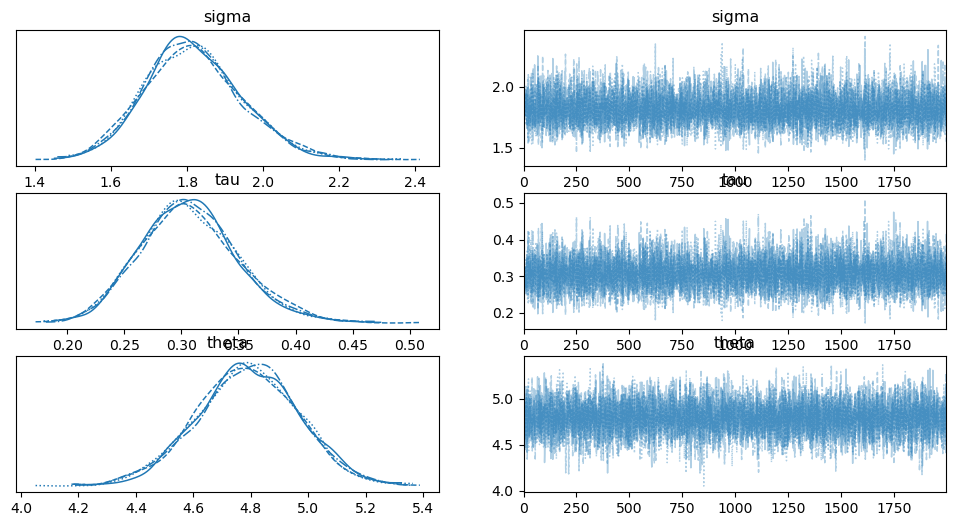

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sigma  1.819  0.129   1.586    2.067      0.001    0.001    8378.0    5819.0   
tau    0.307  0.043   0.227    0.388      0.000    0.000    8378.0    5819.0   
theta  4.789  0.178   4.448    5.118      0.002    0.001    8170.0    5292.0   

       r_hat  
sigma    1.0  
tau      1.0  
theta    1.0  


In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data (Normal distribution)
true_mu = 5  # True mean
true_sigma = 2  # True standard deviation
n_samples = 100  # Number of data points

data = np.random.normal(true_mu, true_sigma, size=n_samples)

# Define the Bayesian model
with pm.Model() as model:
    # Priors
    theta = pm.Normal("theta", mu=0, sigma=10)  # Prior for mean
    tau = pm.Gamma("tau", alpha=1, beta=1)  # Prior for precision (inverse variance)
    
    # Convert tau (precision) to standard deviation
    sigma = pm.Deterministic("sigma", 1 / pm.math.sqrt(tau))
    
    # Likelihood (observed data)
    likelihood = pm.Normal("obs", mu=theta, sigma=sigma, observed=data)
    
    # Inference: Sample from posterior
    trace = pm.sample(2000, return_inferencedata=True)
    
# Trace plot
az.plot_trace(trace)
plt.show()

# Summary statistics
summary = az.summary(trace)
print(summary)


**Interpretation**

The left plots which are the posterior distribution with the solid and dashed lines with different chains overlapping indicate that there is a good convergence between the information. The distribution of these plots also appear smooth and unimodal which means good mixing. From the summary, we can also get the value of posterior mean of the $\sigma$ as 1.819, $\tau$ as 0.307 and $\theta$ 4.789. The High Density Interval (HDI) of these value also (3% and 97% credible intervals) captures a reasonable range.

For the right plots or trace plots, we have chains that appear well-mixed, indicating no trend or drift over iterations. There are also no large jumps, suggesting good exploration of the parameter space. The chains do not get stuck, implying a well-behaved sampler.

In addition to that, the r-hat values are 1, which means no sampling issues and the ESS values are all large numbers, which indicates a sufficient sampling efficiency.

2. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a non normal distribution and your prior for $\tau$ is a non-gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*

Answer:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


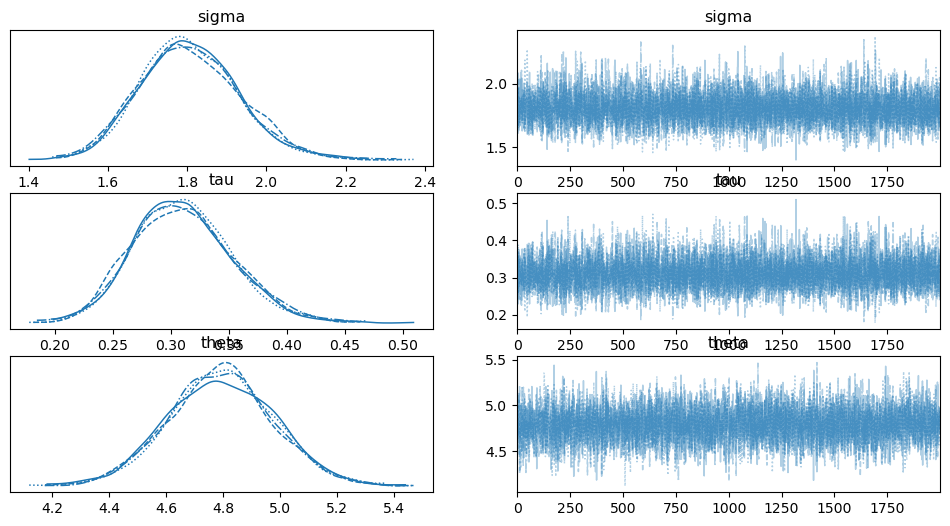

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sigma  1.806  0.124   1.573    2.034      0.001    0.001    7035.0    5204.0   
tau    0.311  0.042   0.236    0.394      0.001    0.000    7035.0    5204.0   
theta  4.792  0.185   4.448    5.136      0.002    0.002    6887.0    5147.0   

       r_hat  
sigma    1.0  
tau      1.0  
theta    1.0  


In [2]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

np.random.seed(42)

# True parameters
true_mu = 5      # True mean
true_sigma = 2   # True standard deviation
n_samples = 100  # Number of observations

# Generate data
data = np.random.normal(true_mu, true_sigma, size=n_samples)

# Define the Bayesian model
with pm.Model() as model:
    # Prior for theta (Non-normal, using a Student's t-distribution)
    theta = pm.StudentT("theta", nu=3, mu=0, sigma=10)  # Heavy-tailed
    
    # Prior for tau (Non-gamma, using an Inverse Gamma distribution)
    tau = pm.InverseGamma("tau", alpha=2, beta=1)
    
    # Convert tau to standard deviation
    sigma = pm.Deterministic("sigma", 1 / pm.math.sqrt(tau))
    
    # Likelihood (observed data)
    likelihood = pm.Normal("obs", mu=theta, sigma=sigma, observed=data)
    
    # Inference: Sample from the posterior
    trace = pm.sample(2000, return_inferencedata=True, target_accept=0.9)

# Plot trace and posterior distributions
az.plot_trace(trace)
plt.show()

# Summary statistics
summary = az.summary(trace)
print(summary)


**Interpretation**

The left plots which are the posterior distribution plot all looks smooth and unimodal, indicating good sampling. The solid and dashed lines also overlap well, which suggests good convergence. The mean estimates are also approximately for $\sigma$ 1.806, for $\tau$ 0.311 and for $\theta$ 4.792. Hence, the model has stable parameters for the posterior distributions.

The right hand side or the trace plots indicate that there are no trends or drifts, which means stationarity. There are also no large jumps or stuck chains, meaning the sampler is mixing well. The density of points also remains consistent over iterations. Thus, the trace plots indicate a well-behaved sampler with good exploration.

In general, the r-hat values obtained are all 1.0, which means perfect convergence. The ESS values above 5000 indicate high-quality sampling. The HDI (Highest Density Interval) captured also shows that the credible intervals contain the true parameter values with high probability. Therefore, the model has converged properly, and the posterior estimates are stable.

3. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a yet another different again non normal distribution and your prior for $\tau$ is a yet another different again non-gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*

Answer:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


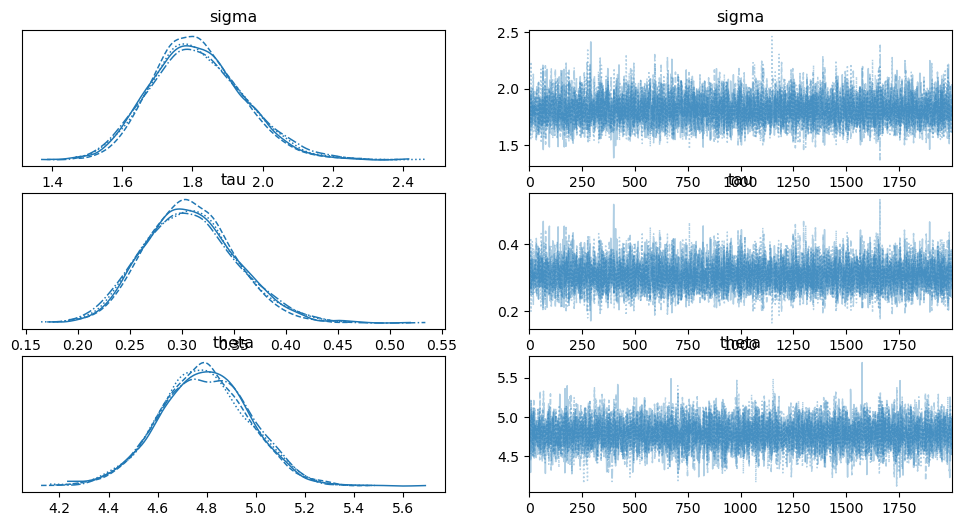

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sigma  1.815  0.131   1.578    2.062      0.002    0.001    7541.0    5524.0   
tau    0.308  0.044   0.228    0.391      0.001    0.000    7541.0    5524.0   
theta  4.789  0.183   4.455    5.137      0.002    0.002    7355.0    5487.0   

       r_hat  
sigma    1.0  
tau      1.0  
theta    1.0  


In [3]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

np.random.seed(42)

# True values
true_mu = 5
true_sigma = 2
n_samples = 100

# Generate sample data
data = np.random.normal(true_mu, true_sigma, size=n_samples)

# Define the Bayesian model
with pm.Model() as model:
    # Prior for theta (Exponential, ensuring non-negative values)
    theta = pm.Exponential("theta", lam=1/5)  # Mean=5, skewed prior
    
    # Prior for tau (Half-Normal, ensuring positive precision)
    tau = pm.HalfNormal("tau", sigma=1)  # Alternative to Inverse Gamma
    
    # Convert tau to standard deviation
    sigma = pm.Deterministic("sigma", 1 / pm.math.sqrt(tau))
    
    # Likelihood (observed data)
    likelihood = pm.Normal("obs", mu=theta, sigma=sigma, observed=data)
    
    # Inference: Sample from the posterior
    trace = pm.sample(2000, return_inferencedata=True, target_accept=0.9)

# Plot trace and posterior distributions
az.plot_trace(trace)
plt.show()

# Summary statistics
summary = az.summary(trace)
print(summary)


**Interpretation**

Similar to the previous questions, the left plots which are the posterior distribution plot all looks smooth and unimodal, indicating good sampling. The solid and dashed lines also overlap well, which suggests good convergence. The mean estimates are also approximately for $\sigma$ 1.815, for $\tau$ 0.308 and for $\theta$ 4.789. Hence, the model has stable parameters for the posterior distributions.

The right hand side or the trace plots indicate that there are no trends or drifts, which means stationarity. There are also no large jumps or stuck chains, meaning the sampler is mixing well. The density of points also remains consistent over iterations. Thus, the trace plots indicate a well-behaved sampler with good exploration.

In general, the r-hat values obtained are all 1.0, which means perfect convergence. The ESS values above 5000 indicate high-quality sampling. The HDI (Highest Density Interval) captured also shows that the credible intervals contain the true parameter values with high probability. Therefore, the model has converged properly, and the posterior estimates are stable.

### Question 3

*First explain how the Markov algorithm of slice sampling as given below works. Then explain the steps by which slice sampling could be used in place of a Metropolis-Hasting step in a Metropolis within Gibbs algorithm where the full conditionals are only known up to a normalizing constant. In your explanation clarify what the curve that we're sampling beneath is, and what the initial value and steps are to create the draw for Gibbs sampling.*

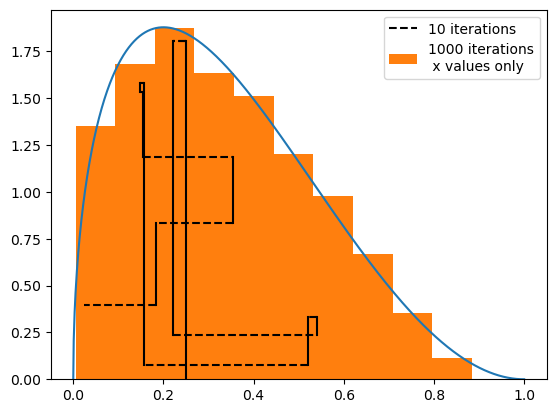

In [7]:
from scipy import stats
def slice_f_at_y(f, x, y, x_grid=np.linspace(0,1,51)):
    
    # find interval of grid points where f(x_grid) > y 
    # then extend the enterval so endpoints f(a)<y and f(b)<y 
    x_grid_delta = x_grid[1]-x_grid[0]
    a,b = x_grid[f(x_grid)>y][[0,-1]]+[-x_grid_delta,x_grid_delta]
    # a,b = x_grid[0,-1]  # make the interval all of x_grid
    
    x_ = a + stats.uniform().rvs()*(b-a)    
    if f(x_)>y:
        return x_,1  # in 1 try if f(x_)>y and "x_ is under f" 
    elif x_ < x:  # or if "x_ was above f on the left side of the interval" 
        x_l,x_r = x_,b
    else:
        x_l,x_r = a,x_  # or if "x_ was above f on the right side of the interval"
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = 2)  # try again with a reduced interval

def slice_f_at_y_(f, x, y, x_l=0, x_r=1, tot=1):
    
    x_ = x_l + stats.uniform().rvs()*(x_r-x_l)
    
    if f(x_)>y:
        return x_,tot
    elif x_ < x:
        x_l = x_
    else:
        x_r = x_
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = tot+1)

x_grid = np.linspace(0,1,1000)
f = lambda x: stats.beta(1.5,3).pdf(x)
plt.plot(x_grid, f(x_grid))
    
m = 1000
x = np.zeros([m+1,3])
x[:2,0] = 0.25

plot_trace = 10
for t in range(1,m):
    
    x[t,1] = stats.uniform().rvs()*f(x[t,0])
    if t < plot_trace:
        plt.plot([x[t,0]]*2, [x[t-1,1],x[t,1]], 'k')
    
    x[t+1,0],x[t+1,2] = slice_f_at_y(f, x[t,0], x[t,1])
    if t < plot_trace:
        if t==1:
            plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--', label=str(plot_trace)+ " iterations")
        plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--')
    
plt.hist(x[:,0], density=True, label=str(m)+" iterations\n x values only")
plt.legend();

Answer: 

1. Explanation of Slice Sampling Algorithm

Slice sampling is a Markov Chain Monte Carlo (MCMC) method that does not require tuning of step sizes, unlike Metropolis-Hastings. It is useful when we can only evaluate the probability density up to a normalizing constant. This algorithm works by first sampling the height of $y$ from $U(0,f(x))$. In other words, we choose a random height that has to be below the probability density function (PDF). Then, we find an interval $[L,R]$ where $f(x)>y$ which is the "slice" of the density function that remains above the sampled height. Then, we sample a new $x'$ from the interval $[L,R]$ which is accepted and then used for the next iteration. Overall, this ensures the efficiency of the exploration of the posterior without requiring a proposal distribution, as in Metropolis-Hastings.

2. Explanation of Replacing the Metropolis-Hastings with Slice Sampling when the Full Conditionals Are Only Known Up to a Normalizing Constant

The min reason why this slice sampling may be preferred over th Metropolis-Hastings step if the full conditionals are only known up to a normalizing constant is because of the tune proposal distribution that is not needed in the slice samplings. Metropolis-Hastings requires a well-chosen proposal distribution to be efficient. But if it gets rejected, it may not be as efficient as desired. On the other hand, the Slice Samplings adapt automatically by sampling within an interval. In addition to that, slice samplings handle complicated distributions better and works very well when the full conditional distributions are unknown up to a normalizing constant. Lastly, it has a more efficient exploration as there will be less autocorrelation compared to the Metropolis-Hastings and no extra tuning parameters required. Therefore, in general, slice sampling is sel-adaptive, making it ideal to be used inside the Gibbs sampling when full conditional distributions are hard to normalize.

3. Explanation of the Coding

From the line, 'f = lambda x: stats.beta(1.5,3).pdf(x)', we an actually see that the sampling used beneath the unnormalized probability density function (PDF) is the Beta(1.5, 3) distribution. Thus, the slice sampling method chooses points only under this curve, ensuring correct sampling. 

The code works by first finding the slice of the interval where $f(x)>y$. This is done in the line 'slice_f_at_y(f, x, y, x_grid)', where this helps fnd the slice that 'f(x)>y' while adjusting the interval $[L,R]$ is necessary. We then sample $x'$ within the slice with the initial value given in the code is from the line $x[:2,0] = 0.25$ which means that the chain starts at $x_0 = 0.25$. Then iterating over 1000 steps (m = 1000) to recursively narrow down the interval until the appropriate $x'$ is obtained. Then, we generate $y$ from the uniform distribution 'x[t,1] = stats.uniform().rvs() * f(x[t,0])'. This ensures uniform sampling within the valid interval. Then, we use 'slice_f_at_y()' to get the next $x'$ for every iteration where each iteration updates x using slice sampling instead of Metropolis-Hastings.
